In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import math
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline

find $T_{c}$

Text(0.5,1,'$\\log (\\zeta /L)$ vs T')

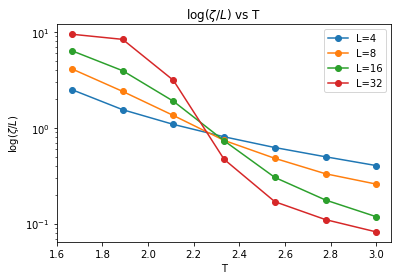

In [9]:
#range[1.6,3]
Ls=[4,8,16,32]
colengthlist=[]
for L in Ls:
    df= pd.read_csv('colength L=%.d.csv'%L)
    cls=df['colength']
    Ts=df['T']
    cls=np.array(cls)
    plt.plot(Ts[3:],cls[3:]/L,'o-',label='L=%.d'%L)
    plt.legend()
    plt.yscale('log')
plt.ylabel('$\log (\zeta /L)$')
plt.xlabel('T')
plt.title('$\log (\zeta /L)$ vs T')

Text(0.5,1,'$\\log (\\zeta /L)$ vs T')

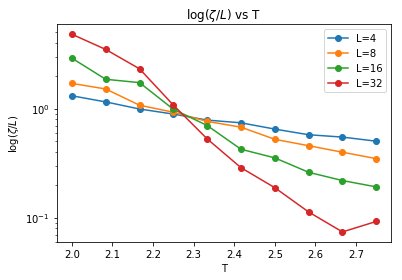

In [11]:
#range[2,2.7]
Ls=[4,8,16,32]
colengthlist=[]
for L in Ls:
    df= pd.read_csv('colength L=%.d zoom in.csv'%L)
    cls=df['colength']
    Ts=df['T']
    cls=np.array(cls)
    plt.plot(Ts,cls/L,'o-',label='L=%.d'%L)
    plt.legend()
    plt.yscale('log')
plt.ylabel('$\log (\zeta /L)$')
plt.xlabel('T')
plt.title('$\log (\zeta /L)$ vs T')

Text(0.5,1,'$\\log (\\zeta /L)$ vs T')

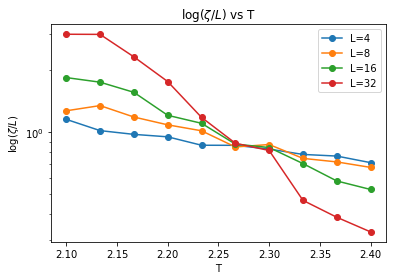

In [12]:
#range[2.1,2.4]
Ls=[4,8,16,32]
colengthlist=[]
for L in Ls:
    df= pd.read_csv('colength L=%.d zoom in2.csv'%L)
    cls=df['colength']
    Ts=df['T']
    cls=np.array(cls)
    plt.plot(Ts,cls/L,'o-',label='L=%.d'%L)
    plt.legend()
    plt.yscale('log')
plt.ylabel('$\log (\zeta /L)$')
plt.xlabel('T')
plt.title('$\log (\zeta /L)$ vs T')

Text(0.5,1,'$\\log (\\zeta /L)$ vs T')

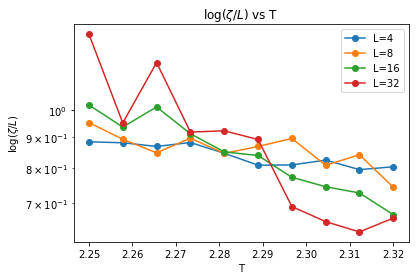

In [13]:
#range[2.25,2.32]
Ls=[4,8,16,32]
colengthlist=[]
for L in Ls:
    df= pd.read_csv('colength L=%.d zoom in3.csv'%L)
    cls=df['colength']
    Ts=df['T']
    cls=np.array(cls)
    plt.plot(Ts,cls/L,'o-',label='L=%.d'%L)
    plt.legend()
    plt.yscale('log')
plt.ylabel('$\log (\zeta /L)$')
plt.xlabel('T')
plt.title('$\log (\zeta /L)$ vs T')

In [61]:
def solve_linear(plist):
    def set_up(p1,p2):
        x1,y1 = p1
        x2,y2 = p2
        return np.array([[-y2+y1,x2-x1]]),np.array([[y1*(x2-x1)-(y2-y1)*x1]])
    p1,p2,p3,p4 = plist
    coef_mat1,ord_val1 = set_up(p1,p2)
    coef_mat2,ord_val2 = set_up(p3,p4)
    coef_mat = np.concatenate((coef_mat1,coef_mat2))
    ord_val  = np.concatenate((ord_val1,ord_val2))
    print(np.linalg.solve(coef_mat,ord_val))
    return np.linalg.solve(coef_mat,ord_val)

def finding_points(Y1,Y2,X):
    """getting p1,p2,p3,p4, later on use them to find crossing point """
    diff = Y2 - Y1
    index = get_index(diff)
    X_l = X[index]
    X_r = X[index+1]
    return (X_l,Y1[index]),(X_r,Y1[index+1]),(X_l,Y2[index]),(X_r,Y2[index+1])

def get_index(difference):
    sign = lambda x: -1 if x<0 else 1
    for i,value in enumerate(difference):   
        if sign(value) != sign(difference[0]):
            return i-1
    raise ValueError("no crossing point")

In [67]:
Ls=[4,8,16,32]
df= pd.read_csv('colength L=4 zoom in2.csv')
Ts=df['T']
result= []
for i,L in enumerate(Ls[:-1]):
    df1= pd.read_csv('colength L=%.d zoom in2.csv'%L)
    cls1 =df1['colength']/L
    df2= pd.read_csv('colength L=%.d zoom in2.csv'%Ls[i+1])
    cls2 =df2['colength']/Ls[i+1]
    result.append(solve_linear(finding_points(cls1,cls2,Ts))[0])
crossingpoint=np.sum(result)/3
print('T_c=', crossingpoint)

[[2.26354575]
 [0.86548977]]
[[2.28301662]
 [0.86124564]]
[[2.27449358]
 [0.86967561]]
T_c= 2.2736853155434003


power law divergence: chi

theoritical: 1.75
experiment: 1.7992656973151209
error: 2.8151827037211925


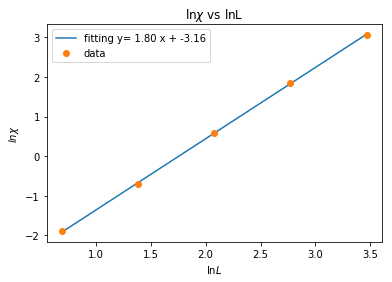

In [35]:
#find critical exponents
#max
Ls=[2,4,8,16,32]
chilist=[]
for L in Ls:
    df= pd.read_csv('data L = %.d .csv'%L)
    chis=df['chi']
    chimax=max(chis[3:])
    chilist.append(chimax)
Ls=np.array(Ls)
chilist=np.array(chilist)
Ls=np.log(Ls)
chilist=np.log(chilist)
para,_=curve_fit(fitting,Ls,chilist)
ylist=[]
for x in Ls:
    y= fitting(x,*para)
    ylist.append(y)
plt.plot(Ls,ylist,label='fitting y= %.2f x + %.2f'%tuple(para))
plt.plot(Ls,chilist,'o',label='data')
plt.legend()
plt.title('$\ln\chi$ vs lnL')
plt.ylabel('$ln\chi$')
plt.xlabel('$\lnL$')
exact= 7/4 
error= abs((exact-para[0]))/exact*100
print('theoritical:',exact)
print('experiment:',para[0])
print('error:',error)

theoritical: 1.75
experiment: 1.8631015565188291
error: 6.462946086790236


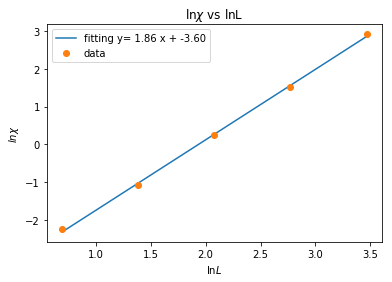

In [71]:
#find critical exponents
#T_c
Ls=[2,4,8,16,32]
chilist=[]
df= pd.read_csv('value of T=Tc.csv')
chis=df['chi']
for chi in chis:
    chilist.append(chi)
Ls=np.log(Ls)
chilist=np.log(chilist)
para,_=curve_fit(fitting,Ls,chilist)
ylist=[]
for x in Ls:
    y= fitting(x,*para)
    ylist.append(y)
plt.plot(Ls,ylist,label='fitting y= %.2f x + %.2f'%tuple(para))
plt.plot(Ls,chilist,'o',label='data')
plt.legend()
plt.title('$\ln\chi$ vs lnL')
plt.ylabel('$ln\chi$')
plt.xlabel('$\lnL$')
exact= 7/4 
error= abs((exact-para[0]))/exact*100
print('theoritical:',exact)
print('experiment:',para[0])
print('error:',error)

theoritical: -0.125
experiment: -0.14057779458606948
error: -12.46223566885558


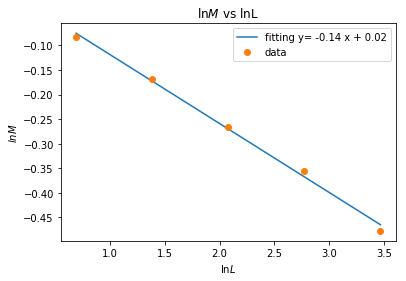

In [76]:
#M
Ls=[2,4,8,16,32]
Mlist=[]
df= pd.read_csv('value of T=Tc.csv')
Ms=df['M']
for M in Ms:
    Mlist.append(M)
Ls=np.log(Ls)
Mlist=np.log(Mlist)
para,_=curve_fit(fitting,Ls,Mlist)
ylist=[]
for x in Ls:
    y= fitting(x,*para)
    ylist.append(y)
plt.plot(Ls,ylist,label='fitting y= %.2f x + %.2f'%tuple(para))
plt.plot(Ls,Mlist,'o',label='data')
plt.legend()
plt.title('$\lnM$ vs lnL')
plt.ylabel('$lnM$')
plt.xlabel('$\lnL$')

exact= -1/8
error= abs((exact-para[0]))/exact*100
print('theoritical:',exact)
print('experiment:',para[0])
print('error:',error)

heat capacity

experiment: 0.6499930246690167


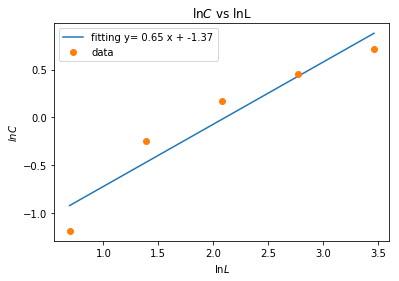

In [73]:
#critical temperature 
#Ln vs Ln again us tc instead
Ls=[2,4,8,16,32]
Clist=[]
df= pd.read_csv('value of T=Tc.csv')
Cs=df['C']
for C in Cs:
    Clist.append(C)
Ls=np.array(Ls)
Clist=np.array(Clist)
Ls=np.log(Ls)
Clist=np.log(Clist)
para,_=curve_fit(fitting,Ls,Clist)
ylist=[]
for x in Ls:
    y= fitting(x,*para)
    ylist.append(y)
plt.plot(Ls,ylist,label='fitting y= %.2f x + %.2f'%tuple(para))
plt.plot(Ls,Clist,'o',label='data')
plt.legend()
plt.title('$\lnC$ vs lnL')
plt.ylabel('$lnC$')
plt.xlabel('$\lnL$')
print('experiment:',para[0])

experiment: 0.6152975973833706


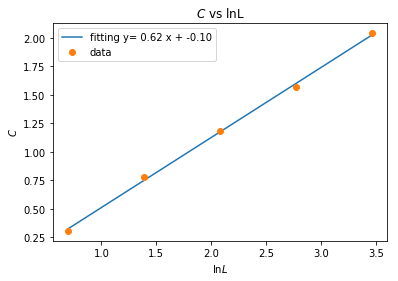

In [74]:
#C vs lnL tc instead
Ls=[2,4,8,16,32]
Clist=[]
df= pd.read_csv('value of T=Tc.csv')
Cs=df['C']
for C in Cs:
    Clist.append(C)
Ls=np.array(Ls)
Clist=np.array(Clist)
Ls=np.log(Ls)
para,_=curve_fit(fitting,Ls,Clist)
ylist=[]
for x in Ls:
    y= fitting(x,*para)
    ylist.append(y)
plt.plot(Ls,ylist,label='fitting y= %.2f x + %.2f'%tuple(para))
plt.plot(Ls,Clist,'o',label='data')
plt.legend()
plt.title('$C$ vs lnL')
plt.ylabel('$C$')
plt.xlabel('$\lnL$')
print('experiment:',para[0])
